# Sample Fitness Polar Dataset

This dataset comes from real data from my Polar user from the year of 2016. Note that I have modified some of the data in order to remove some pre-calculated metrics because this dataset's purpose is to teach some of my students.

The original dataset was downloaded by following the steps described [here](https://support.polar.com/en/how-to-download-all-your-data-from-polar-flow).

Since these data are not well documented, I decided to mention some features that may help you. Do note that most of the file structure is self explainable and it is all in JSON format.

- The ``exercises`` field is a list, but it always has size 1. This is used for sessions with multiple sports in it, like duathlon or triathlon. These are not exercises I practiced in 2016, so there will always be only one exercise in here.

- The ``zones`` field indicates the zones for some metrics. Specially heart rate and speed zones. Why do these divisions exist? Depending on the zone the athlete is performing, the benefits to the human body are different. This is why they exist. The task to find out which benefits each zone provides is up to you.

- The ``samples`` field is one of the most important. It has instant measures for each metric with a timestamp. In 2016, the Polar watch I used (Polar M400) performed one measurement around every 1 second. The ``heartRate`` field values are in beats per minute. The ``speed`` field values are in kilometers per hour. The ``altitude`` and ``distance`` fields are all in meters. The ``distance`` ``value`` fields are cumulative. You may use the ``recordedRoute`` to see the full route on that session.

- The ``weather dataset`` folder contains some weather info only about sessions with GPS data, based on the starting latitude and longitude coordinates. These data came from [visualcrossing service](https://visualcrossing.com/), so it is easy to find documentation about it. The query used to get these data used the ``unitGroup`` as ``metric``. I have provided json and csv files. Use whichever you prefer.

Note that some of these fields may be absent depending on the exercise provided in the file. Some times, I did not wear the heart rate sensor (there is no heart rate data), sometimes I forgot to enable the GPS (there is no GPS, speed, distance data) and so on. Some modalities just do not have some data by definition, for example, the ``strength training`` sessions are just simple workouts on the gym. They do not have GPS data and some of them may not even have heart rate data. Another example is the ``swimming`` sessions. In 2016 I used to swim in an inside pool, so I was not able to use the GPS, although I was able to count how many laps I made on the pool and I manually typed the total distance, so it is possible to find sessions with a total distance, but no GPS data.

You may want to read some texts to familiarize yourself with some metrics. Google about what most fitness watches provide about speed, pace, heart rate zones, what to measure on each kilometer of a session, metrics from the first 5km/10km in a session etc. Be creative on what you can calculate and how to visualize them. Remember that replicating what already exists may be interesting, but you need to go beyond to stand out.

This dataset is meant to be used as a challenge. The data is not the same in all the files and you must study them in order to understand how to process them. Hey, this is the real world!

If you want to use this dataset for self study, classroom or whatever you want to do with it, I just ask you to add a reference to this repo.

Also, feel free to follow me on [Polar Flow](https://flow.polar.com/training/profiles/3142224), [Strava](https://www.strava.com/athletes/9485255) and [Instagram (@mendi_km)](https://instagram.com/mendi_km). You may search for some of these sessions on these platforms to compare your results.

Good luck on the challenge you have been assigned!

<center><img src="https://github.com/juliosaopedro/polar-sample-database/blob/master/image/exercicio.jpg?raw=true" ></p>



## Install da biblioteca ijson
### Ijson is an iterative JSON parser with standard Python iterator interfaces.

In [1]:
!pip install ijson

     |████████████████████████████████| 126 kB 3.1 MB/s 


## Bibliotecas utilizadas

In [2]:
import os, json
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)

## Importacao de demais bibliotecas que serão utilizadas

In [5]:
import ijson
import urllib.request

## Lendo e tratando os arquivos do dataset

In [33]:
temp = pd.DataFrame()

path_to_json = '/content/arquivos/' 

json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern)


dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        sport_places = ijson.kvitems(f, 'exercises.item')
        sport = (v for k, v in sport_places if k == 'sport')
    dfs.append(json_data)

df = pd.concat(dfs, sort=True) 

# Selecionando as colunas a serem analisadas
features_columns = ['startTime', 'stopTime', 'distance', 'name','kiloCalories',
                    'physicalInformationSnapshot.aerobicThreshold','physicalInformationSnapshot.anaerobicThreshold',
                    'physicalInformationSnapshot.maximumHeartRate']
df_tratado = df[features_columns]

df_tratado.head(2)

,startTime,stopTime,distance,name,kiloCalories,physicalInformationSnapshot.aerobicThreshold,physicalInformationSnapshot.anaerobicThreshold,physicalInformationSnapshot.maximumHeartRate
0,2016-09-13T09:58:44.000,2016-09-13T10:32:23.000,NaN,Strength tr.,76.0,148.0,177.0,197.0
0,2016-12-09T12:13:57.000,2016-12-09T12:58:43.000,NaN,Pool swimming,392.0,148.0,177.0,197.0


In [32]:
## Renomeando as colunas
df_tratado.rename(columns={"startTime":"startTime","stopTime":"stopTime", "distance":"distance","name":"sport",
                           "kiloCalories":"kiloCalories", "physicalInformationSnapshot.aerobicThreshold": 
                           "aerobicThreshold", "physicalInformationSnapshot.anaerobicThreshold": 
                           "anaerobicThreshold","anaerobicThreshold":"anaerobicThreshold",
                           "physicalInformationSnapshot.maximumHeartRate":"maximumHeartRate"}, inplace=True);


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Analisando nosso conjunto de dados

### Descrevendo os dados

In [25]:
df_tratado.describe()

,distance,kiloCalories,aerobicThreshold,anaerobicThreshold,maximumHeartRate
count,50.000000,143.000000,133.000000,133.000000,133.000000
mean,10842.343767,343.244755,148.398496,177.398496,197.398496
std,12888.061136,255.477355,0.491440,0.491440,0.491440
min,0.000000,23.000000,148.000000,177.000000,197.000000
25%,1815.500000,154.000000,148.000000,177.000000,197.000000
50%,4740.500000,317.000000,148.000000,177.000000,197.000000
75%,14795.550049,415.500000,149.000000,178.000000,198.000000
max,60084.937500,1557.000000,149.000000,178.000000,198.000000


### Histograma

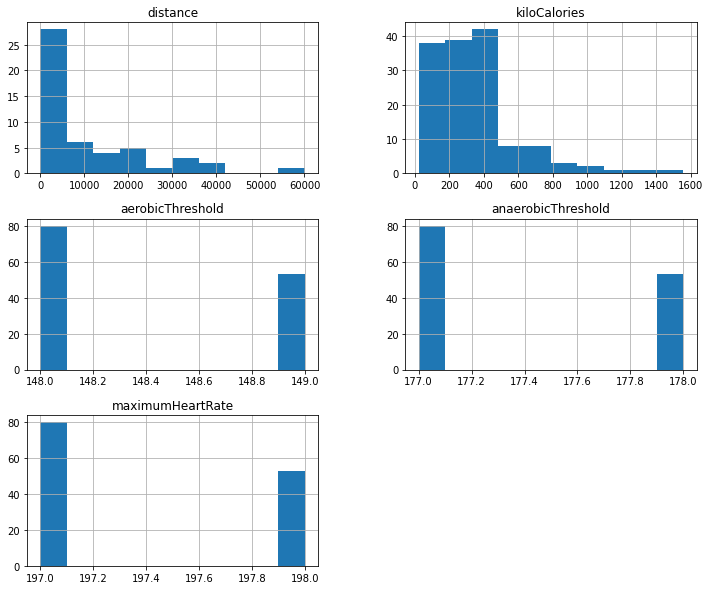

In [31]:
df_tratado.hist(figsize=(12,10));

## Analisando por esporte

In [26]:
df_tratado.groupby(['sport']).mean()

,distance,kiloCalories,aerobicThreshold,anaerobicThreshold,maximumHeartRate
sport,,,,,
Corrida,13734.799805,1066.000000,149.000000,178.000000,198.000000
Corrida em passadeira rolante,3030.000000,204.666667,148.000000,177.000000,197.000000
Cycling,20484.513811,608.000000,148.000000,177.000000,197.000000
Functional tr.,NaN,336.000000,148.000000,177.000000,197.000000
Nadar piscina,1305.000000,361.250000,148.000000,177.000000,197.000000
NataÃ§Ã£o piscina,1344.000000,333.500000,148.000000,177.000000,197.000000
Open water,875.900024,248.000000,148.000000,177.000000,197.000000
Other indoor,NaN,170.857143,148.857143,177.857143,197.857143
Other outdoor,3522.500000,208.000000,148.000000,177.000000,197.000000


In [21]:
## Valores de maximumHeartRate por esporte

df_tratado.groupby(['sport'])['maximumHeartRate'].value_counts()

sport                          maximumHeartRate
Corrida                        198.0                1
Corrida em passadeira rolante  197.0                3
Cycling                        197.0                7
Functional tr.                 197.0                2
Nadar piscina                  197.0                4
NataÃ§Ã£o piscina              197.0                2
Open water                     197.0                1
Other indoor                   198.0               18
                               197.0                3
Other outdoor                  197.0                1
Pool swimm.                    198.0               21
                               197.0               15
Pool swimming                  197.0                9
Running                        198.0                6
                               197.0                5
Strength tr.                   197.0               24
                               198.0                7
Treadmill runn.                197

In [22]:
## Quantidade de ocorrencias distância por esporte

df_tratado.groupby(['sport'])['distance'].value_counts()

sport                          distance    
Corrida                        13734.799805    1
Corrida em passadeira rolante  1800.000000     1
                               4260.000000     1
Cycling                        8113.500000     1
                               14241.599609    1
                               14980.200195    1
                               21850.199219    1
                               22233.199219    1
                               30447.199219    1
                               31525.699219    1
Nadar piscina                  1080.000000     1
                               1152.000000     1
                               1476.000000     1
                               1512.000000     1
NataÃ§Ã£o piscina              1116.000000     1
                               1368.000000     1
                               1548.000000     1
Open water                     875.900024      1
Other outdoor                  3522.500000     1
Running                  

# Insights

- A <b>frequência máxima cardíca</b> (maximumRateHeart) oscilou entre 197 e 198 batimentos cardíacos.
- O <b>consumo médio de kilo calorias</b> dos esportes praticados alcançou o valor de 343.
- O valores médios dos <b>limiares aeróbico e anaeróbico</b> foram respectivamente 148 e 177.
- o esporte que mais consumiu kilo calorias na média foi a <b>Corrida</b> com 1.066 kcal.
- A maior distância média coube ao <b>Ciclismo</b> com 20.484 metros.
- A <b>Corrida em Esteira</b> (Treadmill runn) foi a atividade física que menos consumiu kilo calorias, 95 kcal em média.
<br>

Frequência cardíaca em atividade física por idade <br>
- Idade _	 Frequência cardíaca (bpm)
- 20 ____ 100-170
- 30 ____ 95-162
- 35 ____ 93-157
- 40 ____ 90-153
- 45 ____ 88-149
- 50 ____ 85-145
- 55 ____ 83-140
- 60 ____ 80-136
- 65 ____ 78-132
- 70 ____ 75-128

Como o nosso atleta tinha na época 23 anos, os batimentos cardíacos estão um pouco acima, deveriam estar no máximo em 170 e na realidade estão por volta de 197.

